In [210]:
import pandas as pd
train_data = pd.read_csv('train.csv', index_col = 0)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
test_data = pd.read_csv('test.csv', index_col = 0)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos notar que o valor máximo da coluna fare é muito alto, o que pode indicar a existência de outliers

In [213]:
import matplotlib.pyplot as plt

Podemos perceber que existem outliers na coluna fare cujo valor é acima de 500

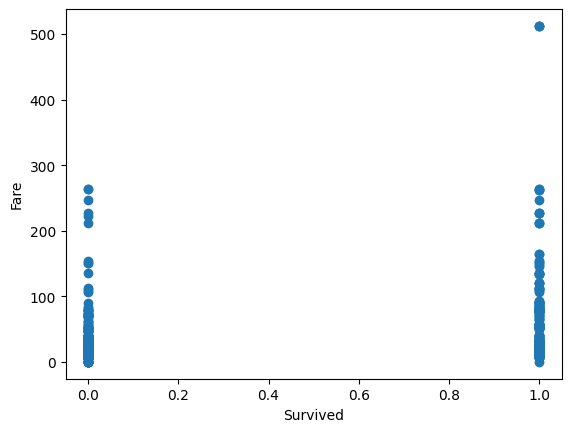

In [214]:
plt.scatter(train_data['Survived'],train_data['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

In [215]:
train_data[train_data['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Removendo os outliers da coluna fare do conjunto de treino

In [216]:
train_data = train_data[(train_data.index != 259) & (train_data.index != 680) & (train_data.index != 738)]

Verificando os valores faltantes

In [217]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       686
Embarked      2
dtype: int64

In [218]:
test_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Podemos perceber que existem vários valores faltantes na coluna Age, tanto no conjunto de treino quanto no de teste

Portanto, vamos utilizar a média para preencher os valores faltantes

In [219]:
import numpy as np
train_data['Age'] = train_data['Age'].replace(np.nan, train_data['Age'].mean())
test_data['Age'] = test_data['Age'].replace(np.nan, test_data['Age'].mean())

<ipython-input-219-a6aaf15985af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'] = train_data['Age'].replace(np.nan, train_data['Age'].mean())


Como a coluna Cabin tem muitos valores faltantes, podemos simplesmente removê-la

In [220]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

Já para a coluna Embarked, ela possui valores faltantes apenas no conjunto de treino

Sendo assim, podemos utilizar a moda nesse caso

In [221]:
train_data['Embarked'] = train_data['Embarked'].replace(np.nan, train_data['Embarked'].mode()[0])

Por fim, a coluna Fare possui um valor faltante no conjunto de teste

Sendo assim, vamos utilizar a média nesse caso

In [222]:
test_data['Fare'] = test_data['Fare'].replace(np.nan, test_data['Fare'].mean())

Checando novamente por valores faltantes

In [223]:
train_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [224]:
test_data.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Podemos utilizar a coluna Name para extrair os títulos dos passageiros

In [225]:
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.Title.value_counts()

Mr              515
Miss            181
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [226]:
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Como podemos perceber, temos alguns outliers

Isso pode ser resolvido fazendo um mapeamento

In [227]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royal",
    "Don":        "Royal",
    "Sir" :       "Royal",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royal",
    "Dona":       "Royal",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royal"
}

train_data.Title = train_data.Title.map(normalized_titles)
test_data.Title = test_data.Title.map(normalized_titles)

In [228]:
train_data['Title'].value_counts()

Mr         515
Miss       183
Mrs        127
Master      40
Officer     18
Royal        5
Name: Title, dtype: int64

In [229]:
test_data['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royal        1
Name: Title, dtype: int64

Não vamos utilizar a coluna Ticket

In [230]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

Também podemos remover a coluna Name

In [231]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

Agora vamos converter os dados categóricos em valores numéricos

Sex, Embarked e Title são variáveis categóricas sem ordem. Portanto, utilizamos OneHotEncoder, em que cada label única é mapeada para um vetor binário

In [232]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Title'])

In [233]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0


In [234]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
PassengerId,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0
893,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0
894,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,0
895,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0
896,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,1,0,0


Como podemos perceber, apenas três amostras foram removidas dos dados de treino(os outliers)

In [235]:
train_data.count()

Survived         888
Pclass           888
Age              888
SibSp            888
Parch            888
Fare             888
Sex_female       888
Sex_male         888
Embarked_C       888
Embarked_Q       888
Embarked_S       888
Title_Master     888
Title_Miss       888
Title_Mr         888
Title_Mrs        888
Title_Officer    888
Title_Royal      888
dtype: int64

In [236]:
rotulos = train_data['Survived']
train_data = train_data.drop("Survived", axis = 1)

Agora vamos escalonar os dados

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

Agora que fizemos o pré-processamento dos dados, vamos avaliar uma rede MLP utilizando o método de validação-cruzada com holdout.

In [238]:
num_camadas_ocultas = [1, 2, 3]
num_neuronios = [16, 32, 64]

Epoch 1/1000
4/4 [==============================] - 1s 68ms/step - loss: 0.8855 - accuracy: 0.3004 - val_loss: 0.8147 - val_accuracy: 0.3034
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8262 - accuracy: 0.3191 - val_loss: 0.7722 - val_accuracy: 0.3483
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7867 - accuracy: 0.3354 - val_loss: 0.7385 - val_accuracy: 0.4045
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7539 - accuracy: 0.4193 - val_loss: 0.7120 - val_accuracy: 0.4494
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.7273 - accuracy: 0.4556 - val_loss: 0.6880 - val_accuracy: 0.5730
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7041 - accuracy: 0.5569 - val_loss: 0.6634 - val_accuracy: 0.6629
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6796 - accuracy: 0.6245 - val_loss: 0.6413 - val_accuracy: 0.7303
Epoch 8/1000


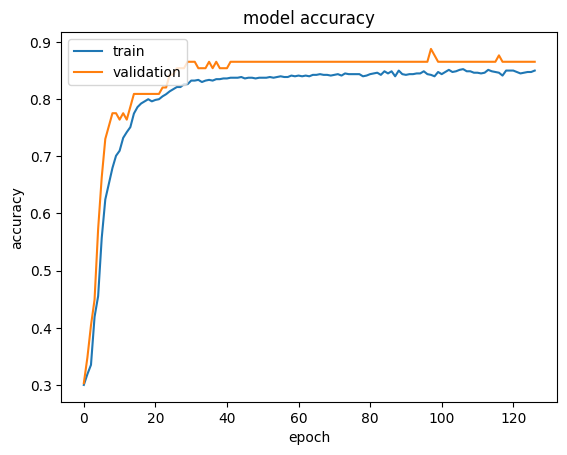

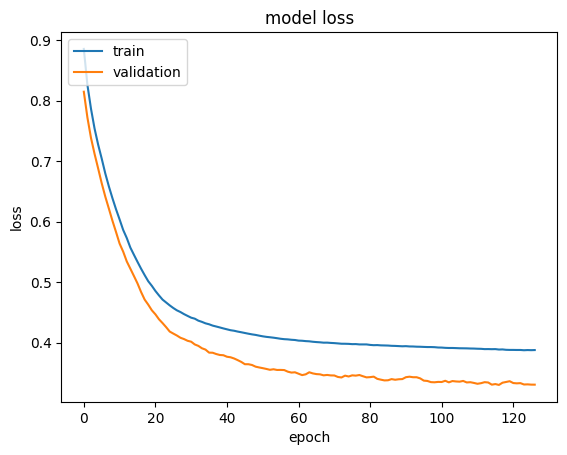

Epoch 1/1000
4/4 [==============================] - 1s 93ms/step - loss: 0.8678 - accuracy: 0.5882 - val_loss: 0.8028 - val_accuracy: 0.6404
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.7773 - accuracy: 0.6258 - val_loss: 0.7364 - val_accuracy: 0.6292
Epoch 3/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.7238 - accuracy: 0.6421 - val_loss: 0.6854 - val_accuracy: 0.6742
Epoch 4/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.6805 - accuracy: 0.6583 - val_loss: 0.6398 - val_accuracy: 0.6854
Epoch 5/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6443 - accuracy: 0.6771 - val_loss: 0.6068 - val_accuracy: 0.7079
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.6171 - accuracy: 0.6921 - val_loss: 0.5793 - val_accuracy: 0.7303
Epoch 7/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.5947 - accuracy: 0.7121 - val_loss: 0.5579 - val_accuracy: 0.7303
Epoch 8/1000


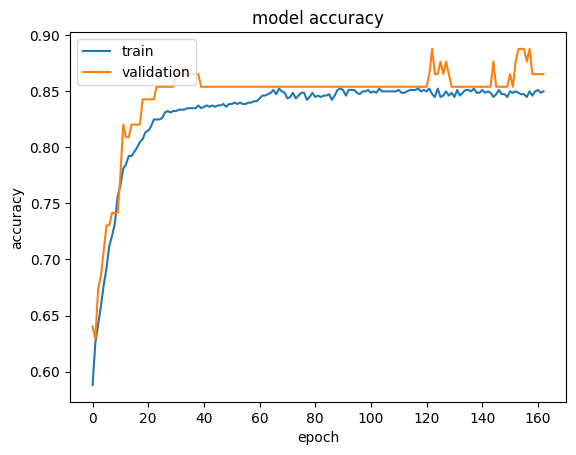

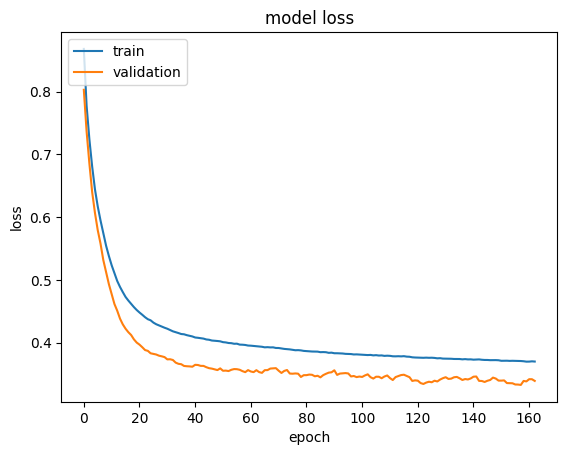

Epoch 1/1000
4/4 [==============================] - 1s 62ms/step - loss: 0.7841 - accuracy: 0.4268 - val_loss: 0.7544 - val_accuracy: 0.5281
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6861 - accuracy: 0.6658 - val_loss: 0.6836 - val_accuracy: 0.6742
Epoch 3/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6351 - accuracy: 0.7284 - val_loss: 0.6252 - val_accuracy: 0.6966
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5937 - accuracy: 0.7372 - val_loss: 0.5861 - val_accuracy: 0.7640
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5609 - accuracy: 0.7647 - val_loss: 0.5480 - val_accuracy: 0.7865
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5356 - accuracy: 0.7835 - val_loss: 0.5236 - val_accuracy: 0.8090
Epoch 7/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.5152 - accuracy: 0.7997 - val_loss: 0.4991 - val_accuracy: 0.8202
Epoch 8/1000


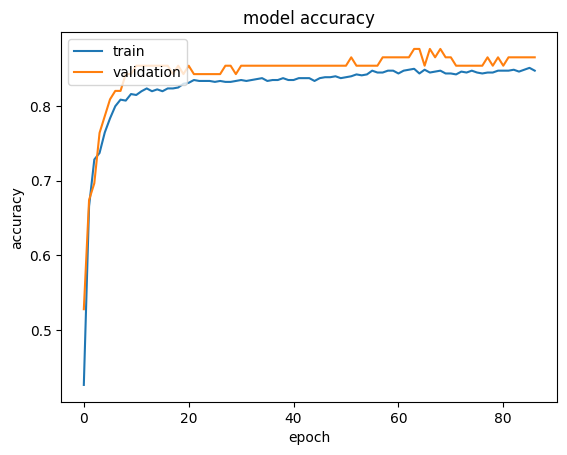

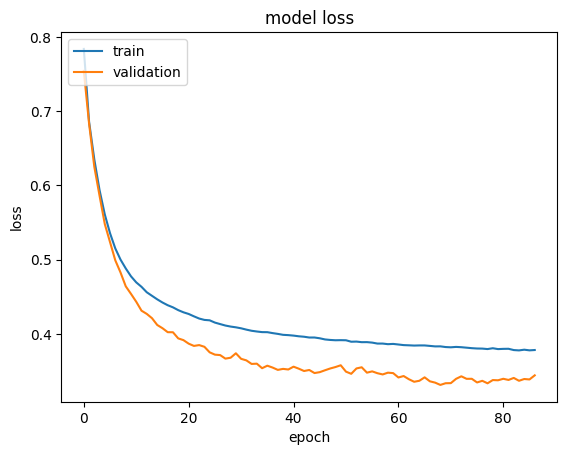

Epoch 1/1000
4/4 [==============================] - 1s 62ms/step - loss: 0.7298 - accuracy: 0.4431 - val_loss: 0.6855 - val_accuracy: 0.6292
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6859 - accuracy: 0.6458 - val_loss: 0.6674 - val_accuracy: 0.6966
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6606 - accuracy: 0.7071 - val_loss: 0.6513 - val_accuracy: 0.7079
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6413 - accuracy: 0.7084 - val_loss: 0.6383 - val_accuracy: 0.6742
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6250 - accuracy: 0.7209 - val_loss: 0.6280 - val_accuracy: 0.6742
Epoch 6/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6103 - accuracy: 0.7284 - val_loss: 0.6157 - val_accuracy: 0.6854
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5947 - accuracy: 0.7347 - val_loss: 0.6047 - val_accuracy: 0.6854
Epoch 8/1000


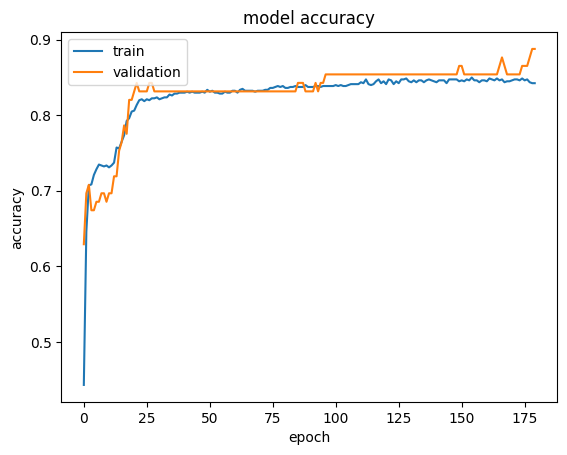

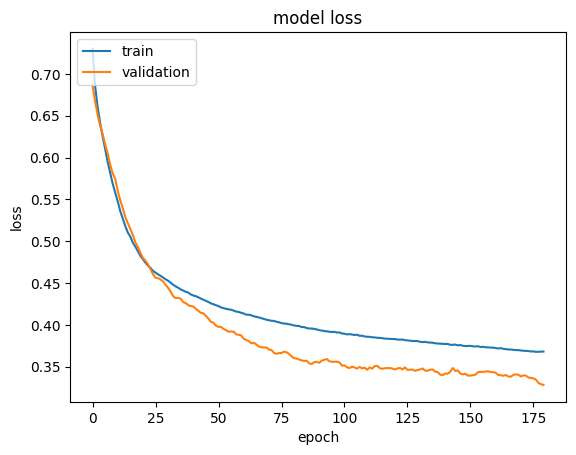

Epoch 1/1000
4/4 [==============================] - 1s 72ms/step - loss: 0.6291 - accuracy: 0.6896 - val_loss: 0.5411 - val_accuracy: 0.7416
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5529 - accuracy: 0.7785 - val_loss: 0.4936 - val_accuracy: 0.7753
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5214 - accuracy: 0.7922 - val_loss: 0.4616 - val_accuracy: 0.7978
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4973 - accuracy: 0.7997 - val_loss: 0.4393 - val_accuracy: 0.8202
Epoch 5/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.4812 - accuracy: 0.8048 - val_loss: 0.4205 - val_accuracy: 0.8202
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4665 - accuracy: 0.8048 - val_loss: 0.4069 - val_accuracy: 0.8315
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4567 - accuracy: 0.8135 - val_loss: 0.3991 - val_accuracy: 0.8427
Epoch 8/1000


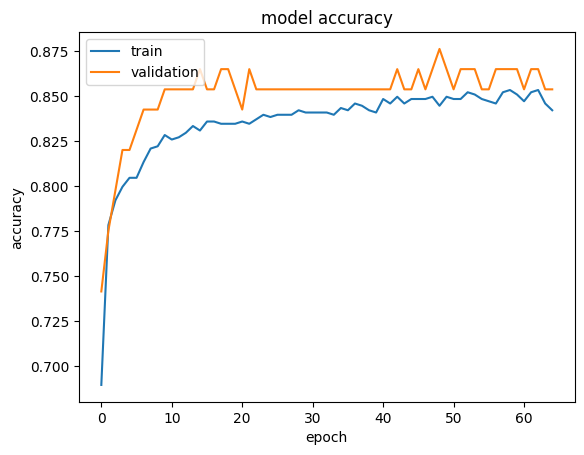

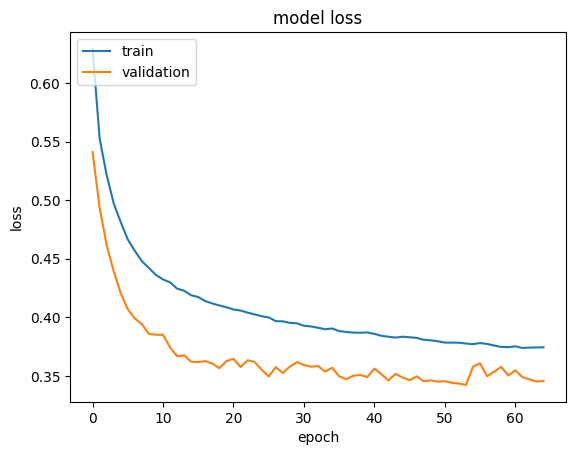

Epoch 1/1000
4/4 [==============================] - 1s 100ms/step - loss: 0.6216 - accuracy: 0.6934 - val_loss: 0.5382 - val_accuracy: 0.7528
Epoch 2/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.5217 - accuracy: 0.7872 - val_loss: 0.4834 - val_accuracy: 0.8090
Epoch 3/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.4894 - accuracy: 0.7935 - val_loss: 0.4416 - val_accuracy: 0.8315
Epoch 4/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.4664 - accuracy: 0.8085 - val_loss: 0.4166 - val_accuracy: 0.8315
Epoch 5/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.4521 - accuracy: 0.8073 - val_loss: 0.4116 - val_accuracy: 0.8539
Epoch 6/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.4429 - accuracy: 0.8248 - val_loss: 0.3892 - val_accuracy: 0.8539
Epoch 7/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4331 - accuracy: 0.8248 - val_loss: 0.3891 - val_accuracy: 0.8652
Epoch 8/1000

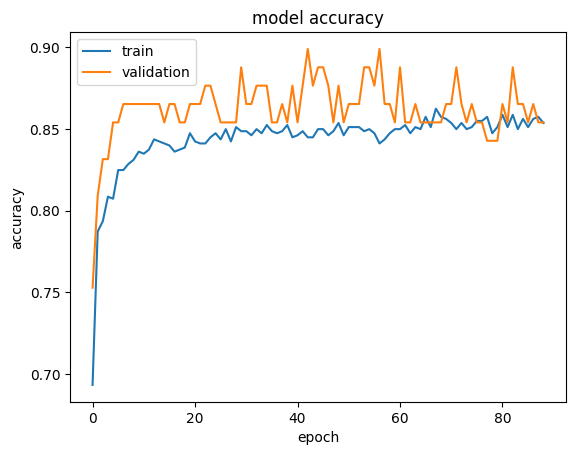

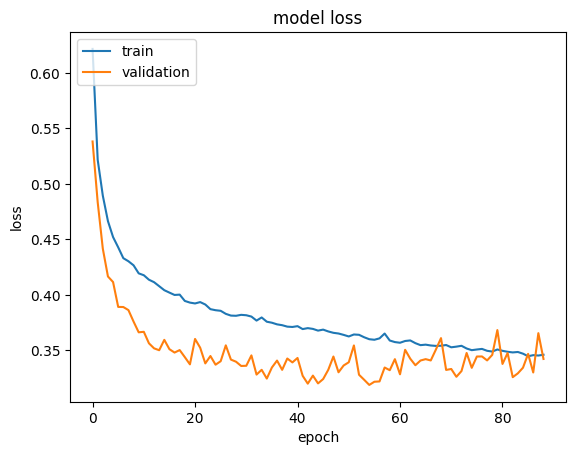

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.6171 - accuracy: 0.6971 - val_loss: 0.6005 - val_accuracy: 0.6742
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5845 - accuracy: 0.7234 - val_loss: 0.5793 - val_accuracy: 0.6966
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5646 - accuracy: 0.7484 - val_loss: 0.5619 - val_accuracy: 0.7191
Epoch 4/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.5478 - accuracy: 0.7647 - val_loss: 0.5481 - val_accuracy: 0.7528
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5352 - accuracy: 0.7747 - val_loss: 0.5348 - val_accuracy: 0.7640
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5250 - accuracy: 0.7835 - val_loss: 0.5227 - val_accuracy: 0.7978
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5135 - accuracy: 0.7885 - val_loss: 0.5104 - val_accuracy: 0.7753
Epoch 8/1000


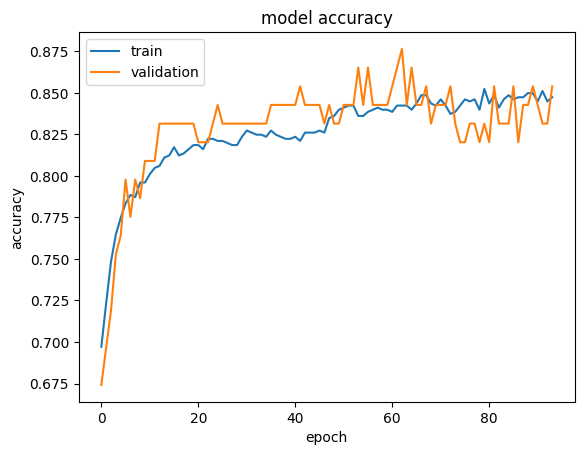

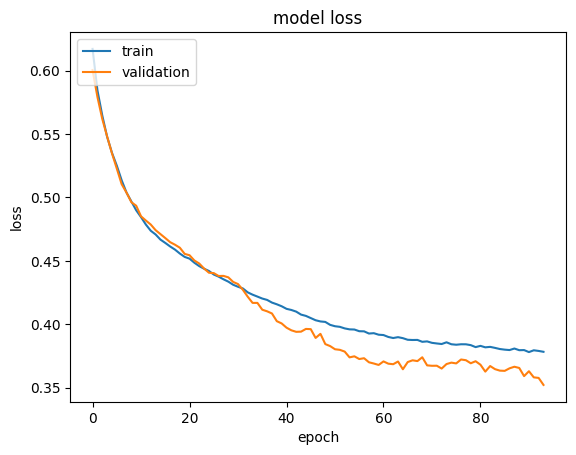

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.6512 - accuracy: 0.6283 - val_loss: 0.5781 - val_accuracy: 0.7303
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.5810 - accuracy: 0.7146 - val_loss: 0.5436 - val_accuracy: 0.7640
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5446 - accuracy: 0.7897 - val_loss: 0.5134 - val_accuracy: 0.7753
Epoch 4/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.5149 - accuracy: 0.7997 - val_loss: 0.4991 - val_accuracy: 0.7865
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4981 - accuracy: 0.7935 - val_loss: 0.4760 - val_accuracy: 0.7978
Epoch 6/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4801 - accuracy: 0.8010 - val_loss: 0.4618 - val_accuracy: 0.8090
Epoch 7/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4674 - accuracy: 0.8023 - val_loss: 0.4563 - val_accuracy: 0.7865
Epoch 8/1000


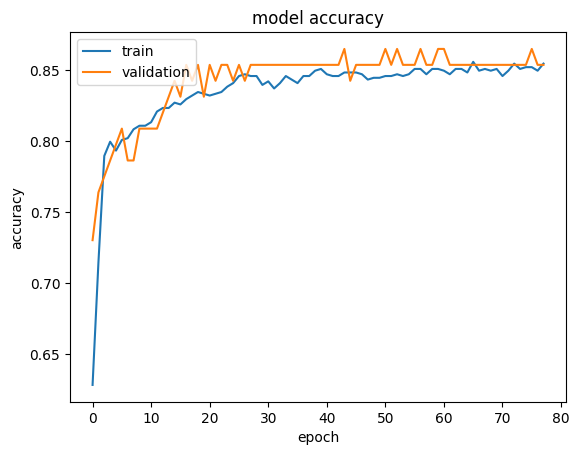

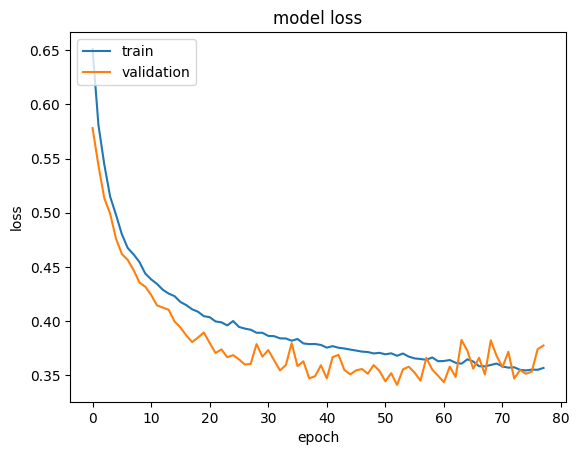

Epoch 1/1000
4/4 [==============================] - 1s 73ms/step - loss: 0.6066 - accuracy: 0.7222 - val_loss: 0.5379 - val_accuracy: 0.7753
Epoch 2/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5103 - accuracy: 0.7922 - val_loss: 0.4916 - val_accuracy: 0.7865
Epoch 3/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4798 - accuracy: 0.8035 - val_loss: 0.4566 - val_accuracy: 0.7978
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4612 - accuracy: 0.8098 - val_loss: 0.4433 - val_accuracy: 0.8315
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4475 - accuracy: 0.8185 - val_loss: 0.4360 - val_accuracy: 0.8315
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.4362 - accuracy: 0.8210 - val_loss: 0.4100 - val_accuracy: 0.8539
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4275 - accuracy: 0.8260 - val_loss: 0.3847 - val_accuracy: 0.8652
Epoch 8/1000


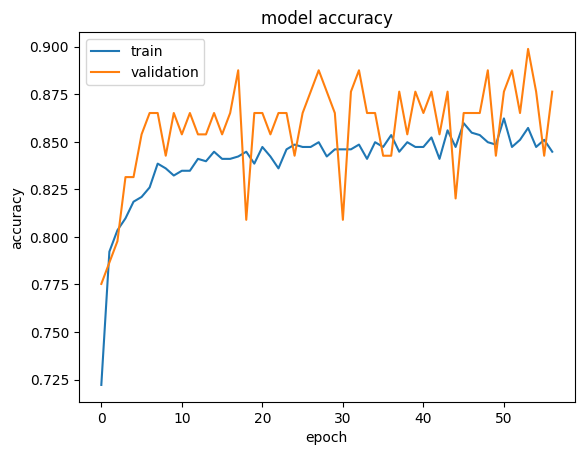

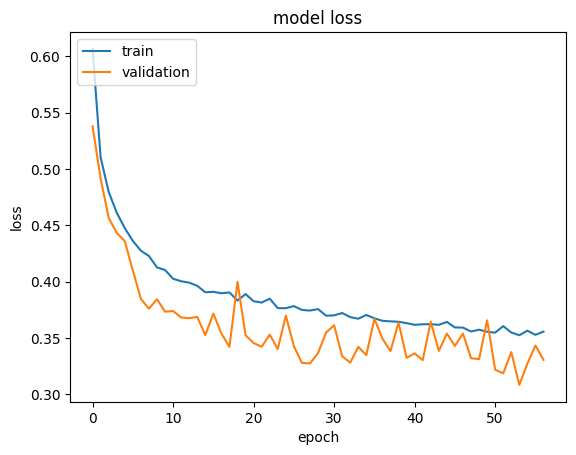

In [239]:
from tensorflow import keras
best_model = None
best_accuracy = 0.0
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
for nco in num_camadas_ocultas:
  for nn in num_neuronios:
    model = keras.Sequential()
    for i in range(nco):
      model.add(keras.layers.Dense(nn, activation="relu"))
    model.add(keras.layers.Dense(2, activation="softmax"))
    model.compile(optimizer="rmsprop" , loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(x=train_data_scaled,y=rotulos, epochs=1000, batch_size=256, callbacks = [callback], validation_split=0.1)
    accuracy = history.history['val_accuracy'][-1]
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [240]:
print("Melhor modelo: ")
for layer in best_model.layers:
    print(layer.name)
    print(layer.units)

Melhor modelo: 
dense_182
16
dense_183
16
dense_184
2


Retreinando com os dados de validação

In [241]:
best_model.fit(x=train_data_scaled,y=rotulos, epochs=1000, batch_size=256, callbacks = [callback])

Epoch 1/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3641 - accuracy: 0.8480
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.8468
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8468
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8468
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8491
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8457
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8480
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8468
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8468
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.8457
Epoch 11/1000
4/4 [

Já que não possuímos os rótulos, precisamos submeter as predições no kaggle para saber a acurácia final

In [242]:
predicoes = best_model.predict(test_data_scaled)
y_pred = np.argmax(predicoes, axis=1)

14/14 [==============================] - 0s 2ms/step


In [243]:
indices = test_data.index
resultado = pd.DataFrame(y_pred, index = indices)
resultado.columns = ["Survived"]
resultado

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [244]:
resultado.to_csv("predicoes.csv")

Como podemos perceber, a acurácia  final foi 0.7799

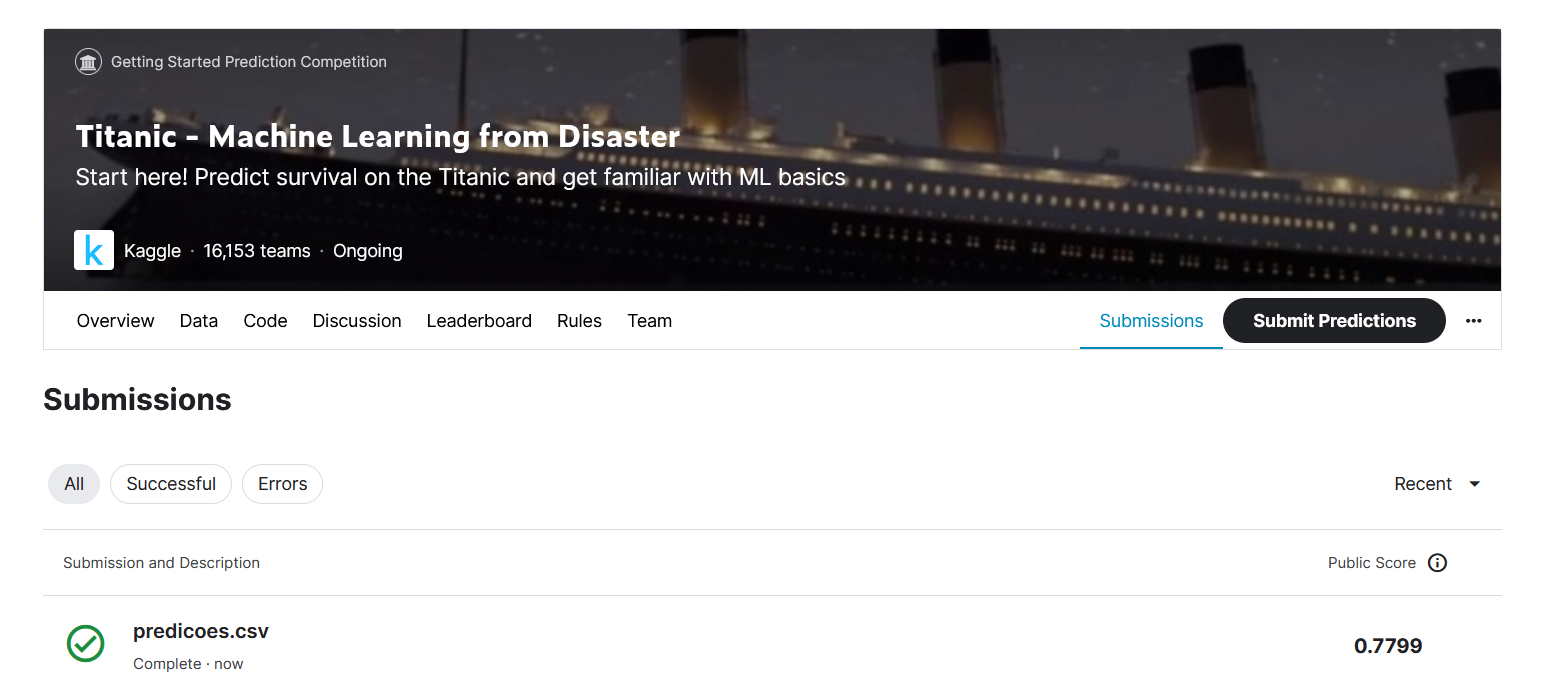

In [245]:
from IPython.display import Image

# Exibir a imagem
Image(filename="/content/acuraciafinal.png")